In [1]:
import pandas as pd

explor  = pd.read_csv('air_data.csv')
explor.T

,0,1,2,3,4,5,6,7,8,9,...,62978,62979,62980,62981,62982,62983,62984,62985,62986,62987
MEMBER_NO,54993,28065,55106,21189,39546,56972,44924,22631,32197,31645,...,22761,34330,1761,15206,16415,18375,36041,45690,61027,61340
FFP_DATE,2006/11/2,2007/2/19,2007/2/1,2008/8/22,2009/4/10,2008/2/10,2006/3/22,2010/4/9,2011/6/7,2010/7/5,...,2011/4/14,2013/3/16,2012/8/7,2011/12/2,2013/1/20,2011/5/20,2010/3/8,2006/3/30,2013/2/6,2013/2/17
FIRST_FLIGHT_DATE,2008/12/24,2007/8/3,2007/8/30,2008/8/23,2009/4/15,2009/9/29,2006/3/29,2010/4/9,2011/7/1,2010/7/5,...,2011/4/14,2013/3/17,2012/9/9,2011/12/2,2013/1/20,2013/6/5,2013/9/14,2006/12/2,2013/2/14,2013/2/17
GENDER,男,男,男,男,男,男,男,女,男,女,...,男,男,女,女,女,女,男,女,女,女
FFP_TIER,6,6,6,5,6,6,6,6,5,6,...,4,4,4,4,4,4,4,4,4,4
WORK_CITY,.,NaN,.,Los Angeles,贵阳,广州,乌鲁木齐市,温州市,DRANCY,温州,...,汕头,乌鲁木齐,深圳,广州,北京,广州,佛山,广州,广州,上海
WORK_PROVINCE,北京,北京,北京,CA,贵州,广东,新疆,浙江,NaN,浙江,...,广东省,新疆,广东,广东,.,广东,广东,广东,广东,.
WORK_COUNTRY,CN,CN,CN,US,CN,CN,CN,CN,FR,CN,...,CN,CN,CN,CN,CN,CN,CN,CN,CN,CN
AGE,31,42,40,64,48,64,46,50,50,43,...,48,41,29,42,35,25,38,43,36,29
LOAD_TIME,2014/3/31,2014/3/31,2014/3/31,2014/3/31,2014/3/31,2014/3/31,2014/3/31,2014/3/31,2014/3/31,2014/3/31,...,2014/3/31,2014/3/31,2014/3/31,2014/3/31,2014/3/31,2014/3/31,2014/3/31,2014/3/31,2014/3/31,2014/3/31


In [2]:
import numpy as np

datafile ='air_data.csv'
cleanedFile = 'datta_cleaned.csv'
airline_data = pd.read_csv(datafile,encoding='utf-8')
print('获取原始数据形状', airline_data.shape)

airline_notnull = airline_data.loc[airline_data['SUM_YR_1'].notnull() & airline_data['SUM_YR_2'].notnull(),:]
print('删除某些数据后的形状', airline_notnull.shape)

index1 = airline_notnull['SUM_YR_1'] != 0
index2 = airline_notnull['SUM_YR_2'] != 0

index3 =(airline_notnull['SEG_KM_SUM'] >0) & (airline_notnull['avg_discount'] != 0)

index4 = airline_notnull['AGE']>100
airline = airline_notnull[(index1 |index2) & index3 & -index4]
print('数据清洗后形状', airline.shape)

airline.to_csv(cleanedFile)

获取原始数据形状 (62988, 44)
删除某些数据后的形状 (62299, 44)
数据清洗后形状 (62043, 44)


In [3]:
cleaned_file ='datta_cleaned.csv'
airline = pd.read_csv(cleaned_file)
airline_selection = airline[['LOAD_TIME','FFP_DATE', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'avg_discount']]
airline_selection.head().T

,0,1,2,3,4
LOAD_TIME,2014/3/31,2014/3/31,2014/3/31,2014/3/31,2014/3/31
FFP_DATE,2006/11/2,2007/2/19,2007/2/1,2008/8/22,2009/4/10
LAST_TO_END,1,7,11,97,5
FLIGHT_COUNT,210,140,135,23,152
SEG_KM_SUM,580717,293678,283712,281336,309928
avg_discount,0.961639,1.25231,1.25468,1.09087,0.970658


In [4]:
L = pd.to_datetime(airline_selection['LOAD_TIME']) - pd.to_datetime(airline_selection['FFP_DATE'])
L.head()

0   2706 days
1   2597 days
2   2615 days
3   2047 days
4   1816 days
dtype: timedelta64[ns]

In [5]:
L = L.astype('str').str.split().str[0]
L.head()

0    2706
1    2597
2    2615
3    2047
4    1816
dtype: object

In [6]:
L = L.astype('int')/30
L.head()

0    90.200000
1    86.566667
2    87.166667
3    68.233333
4    60.533333
dtype: float64

In [7]:
airline_features = pd.concat([L,airline_selection.iloc[:, 2:]],axis=1)
airline_features.columns = ['L', 'R', 'F', 'M', 'C']
airline_features.head()

,L,R,F,M,C
0,90.200000,1,210,580717,0.961639
1,86.566667,7,140,293678,1.252314
2,87.166667,11,135,283712,1.254676
3,68.233333,97,23,281336,1.090870
4,60.533333,5,152,309928,0.970658


In [8]:
from sklearn.preprocessing import StandardScaler
data = StandardScaler().fit_transform(airline_features)

np.savez('airline_scale.npz',data)
data[:5,]

array([[ 1.43579256, -0.94493902, 14.03402401, 26.76115699,  1.29554188],
       [ 1.30723219, -0.91188564,  9.07321595, 13.12686436,  2.86817777],
       [ 1.32846234, -0.88985006,  8.71887252, 12.65348144,  2.88095186],
       [ 0.65853304, -0.41608504,  0.78157962, 12.54062193,  1.99471546],
       [ 0.3860794 , -0.92290343,  9.92364019, 13.89873597,  1.34433641]])

In [9]:
from sklearn.cluster import KMeans
airline_scale = np.load('airline_scale.npz')['arr_0']
k = 5
kmeans_model = KMeans(n_clusters =k,random_state=123,n_jobs=3)
fit_means = kmeans_model.fit(airline_scale)
kmeans_cc = kmeans_model.cluster_centers_
kmeans_cc

array([[ 1.16088402e+00, -3.77441153e-01, -8.66305084e-02,
        -9.45410571e-02, -1.56699730e-01],
       [ 4.64671934e-02, -1.83347106e-03, -2.30222312e-01,
        -2.34604695e-01,  2.17826398e+00],
       [-7.00400970e-01, -4.15181398e-01, -1.60852710e-01,
        -1.60602909e-01, -2.56563446e-01],
       [ 4.83708578e-01, -7.99390422e-01,  2.48317171e+00,
         2.42445742e+00,  3.09239622e-01],
       [-3.13194484e-01,  1.68639463e+00, -5.73898809e-01,
        -5.36735791e-01, -1.75093685e-01]])

In [10]:
kmeans_labels = kmeans_model.labels_
kmeans_labels

array([3, 3, 3, ..., 2, 4, 4], dtype=int32)

In [11]:
r1 = pd.Series(kmeans_labels).value_counts()
r1

2    24636
0    15734
4    12120
3     5337
1     4216
dtype: int64

In [12]:
cluster_center =pd.DataFrame(kmeans_model.cluster_centers_,columns=['L', 'R', 'F', 'M', 'C'])
cluster_center

,L,R,F,M,C
0,1.160884,-0.377441,-0.086631,-0.094541,-0.156700
1,0.046467,-0.001833,-0.230222,-0.234605,2.178264
2,-0.700401,-0.415181,-0.160853,-0.160603,-0.256563
3,0.483709,-0.799390,2.483172,2.424457,0.309240
4,-0.313194,1.686395,-0.573899,-0.536736,-0.175094


In [13]:
cluster_center.index = pd.DataFrame(kmeans_model.labels_).drop_duplicates().iloc[:,0]
cluster_center

,L,R,F,M,C
0,,,,,
3,1.160884,-0.377441,-0.086631,-0.094541,-0.156700
1,0.046467,-0.001833,-0.230222,-0.234605,2.178264
0,-0.700401,-0.415181,-0.160853,-0.160603,-0.256563
2,0.483709,-0.799390,2.483172,2.424457,0.309240
4,-0.313194,1.686395,-0.573899,-0.536736,-0.175094


In [14]:
import matplotlib.pyplot as plt

labers = ['L', 'R', 'F', 'M', 'C']
legen = ['customer'+ str(i+1)for i in cluster_center.index ]
lstype = ['-','--',(0,(3,5,1,5,1,5)),":",'-.']
kinds = list(cluster_center.iloc[:,0])
kinds

[1.160884020596542,
 0.046467193416429776,
 -0.7004009696256859,
 0.4837085783162159,
 -0.3131944841567741]

In [15]:
cluster_center = pd.concat([cluster_center,cluster_center[['L']]],axis=1)
cluster_center

,L,R,F,M,C,L
0,,,,,,
3,1.160884,-0.377441,-0.086631,-0.094541,-0.156700,1.160884
1,0.046467,-0.001833,-0.230222,-0.234605,2.178264,0.046467
0,-0.700401,-0.415181,-0.160853,-0.160603,-0.256563,-0.700401
2,0.483709,-0.799390,2.483172,2.424457,0.309240,0.483709
4,-0.313194,1.686395,-0.573899,-0.536736,-0.175094,-0.313194


In [16]:
centers = np.array(cluster_center.iloc[:,0:])
centers


array([[ 1.16088402e+00, -3.77441153e-01, -8.66305084e-02,
        -9.45410571e-02, -1.56699730e-01,  1.16088402e+00],
       [ 4.64671934e-02, -1.83347106e-03, -2.30222312e-01,
        -2.34604695e-01,  2.17826398e+00,  4.64671934e-02],
       [-7.00400970e-01, -4.15181398e-01, -1.60852710e-01,
        -1.60602909e-01, -2.56563446e-01, -7.00400970e-01],
       [ 4.83708578e-01, -7.99390422e-01,  2.48317171e+00,
         2.42445742e+00,  3.09239622e-01,  4.83708578e-01],
       [-3.13194484e-01,  1.68639463e+00, -5.73898809e-01,
        -5.36735791e-01, -1.75093685e-01, -3.13194484e-01]])

In [17]:
n = len(labers)
angle = np.linspace(0, 2*np.pi,n,endpoint=False)
angle = np.concatenate((angle,[angle[0]]))
angle

array([0.        , 1.25663706, 2.51327412, 3.76991118, 5.02654825,
       0.        ])

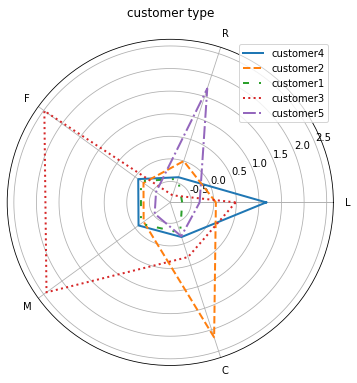

In [18]:
fig =plt.figure(figsize=(8,6))
ax = fig.add_subplot(111,polar=True)
for i in range(len(kinds)):
    ax.plot(angle,centers[i],linestyle=lstype[i], linewidth=2,label=kinds[i])
ax.set_thetagrids(angle *180 /np.pi, labers)
plt.title('customer type')
plt.legend(legen)
plt.show()